# <b>OBJECTIVE:


### GIVEN

<ul>
<li>Age of a person</li>
<li>eductaion qualification</li>
<li>hours-per-week</li>
<li>gender</li>

TO PREDICT:
<li>To identify the income of a person.</li>
</ul>   

### DESCRIPTION


 * age: continuous.
 * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 * fnlwgt: continuous.
 * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
 * education-num: continuous.
 * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-      op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 * sex: Female, Male.
 * capital-gain: continuous.
 * capital-loss: continuous.
 * hours-per-week: continuous.
 * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,      Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,    Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,      El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 * income: >50K, <=50K 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
l=["?","-","n/a"]
df=pd.read_csv("adult.csv",na_values=l)

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
row,col=df.shape
print(row)

48842


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# MISSING VALUE ANALYSIS

In [7]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [10]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [11]:
#type od missing value -workclass
a=df['workclass'].loc[df['income']<"<=50k"].isnull().sum()
b=df['workclass'].loc[df['income']<"<=50k"].isnull().sum()/df["workclass"].isnull().sum()
print("  <=50k =",a)
print("% of<50k =",b*100)

  <=50k = 2534
% of<50k = 90.53233297606288


In [12]:
df['workclass'].loc[df['income']>"<=50k"].isnull().sum()

265

<li>These missing value are type of missing at random(MAR)</li>
<li>As the missing value percentage of workclass is high when the income is low i.e 90% </li>

In [13]:
#type of missing value-occupation
df['occupation'].loc[df['income']<"<=50k"].isnull().sum()/df['occupation'].isnull().sum()


0.9056603773584906

<li>lower the income more the missing values </li>

In [14]:
#drop rows with missing columns
df.dropna(axis=0,how="any",inplace=True)

In [15]:
#df.shape

In [16]:
# drop the column flnwgt
df.drop(columns=["fnlwgt"],inplace=True)

In [17]:
Row,Col=df.shape
print(row)

48842


In [18]:
df.isnull().sum(axis=0)

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [19]:
# %of dropped rows is
r=((row-Row)/row)*100
print("% of row dropped =",r)

% of row dropped = 7.411653904426519


# UNIVARIATE ANALYSIS

In [20]:
df.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### CONTINOUS VARIABLE

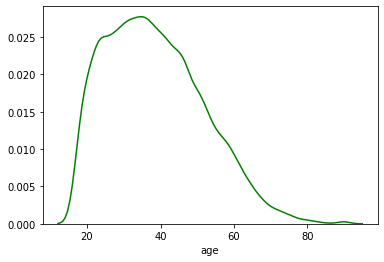

In [21]:
sns.distplot(df['age'],color="g",bins=10,hist=False)

<li> The right skewness of the graph shows the outliers of the graphs</li>

Text(0, 0.5, 'age')

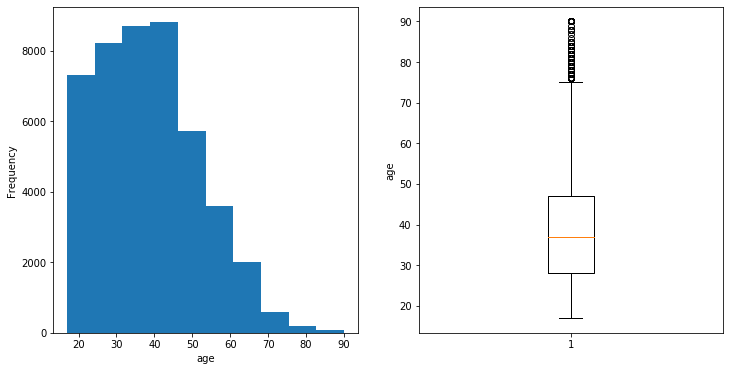

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
df['age'].plot.hist(bins=10)
plt.xlabel("age")

plt.subplot(1,2,2)
plt.boxplot(df["age"])
plt.ylabel("age")

<ul>
    <li>The right skeweness of the histogram shows the present of outliers</li>
    <li> The boxplot shows that the age above 75 is an outlier</li>
    <li>The maximum number of pepole working are in between 40-50</li>
</ul>

Text(0.5, 0, 'capital-gain')

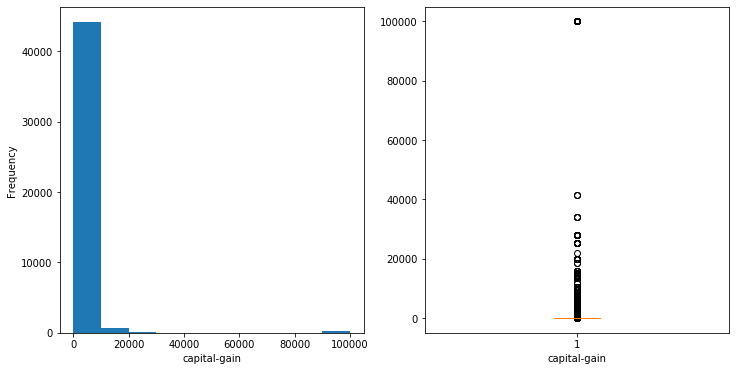

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
df['capital-gain'].plot.hist(bins=10)
plt.xlabel("capital-gain")

plt.subplot(1,2,2)
plt.boxplot(df["capital-gain"])
plt.xlabel("capital-gain")

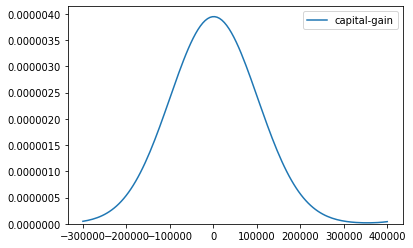

In [24]:
#sns.distplot(df['capital-gain'],color="g",bins=0,hist=False,cumulative=True)
sns.kdeplot(df["capital-gain"],bw=100000)

<ul>
<li>Capital-gain is limited to small number of people</li>
<li>25,50,75 % quartiles all mark zero as most of the rows has this columns as zero</li>
<li>There are some large amount of capital gain that are treated as outliers</li>
</ul>

Text(0.5, 0, 'hours-per-week')

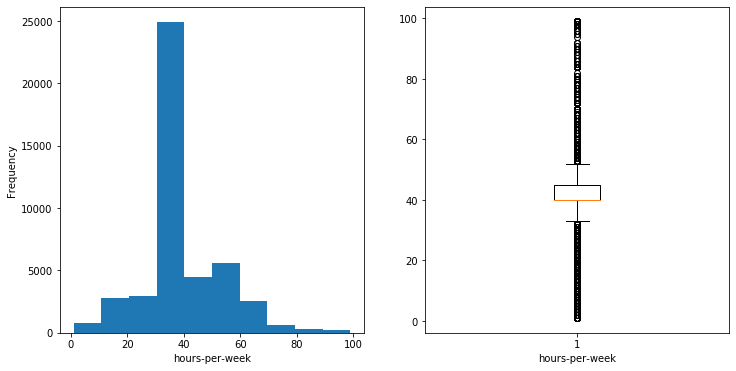

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
df['hours-per-week'].plot.hist(bins=10)
plt.xlabel("hours-per-week")

plt.subplot(1,2,2)
plt.boxplot(df["hours-per-week"])
plt.xlabel("hours-per-week")

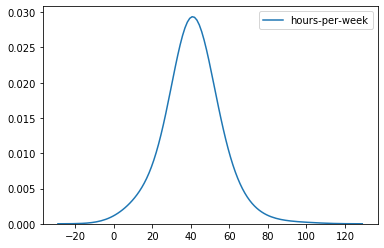

In [26]:
sns.kdeplot(df["hours-per-week"],bw=10)

<ul>
<li>The maximum people have about 40 hours per week work</li>
<li>The right skewed-ness of histrogram shows the present of outrliers that are also given by box plot</li>
<li>Maximum hours of work are 100 hours per week that gives an average of 14 hours per day
    minimum lies between 1-2 hours per week</li>
</ul>

Text(0.5, 0, 'capital-loss')

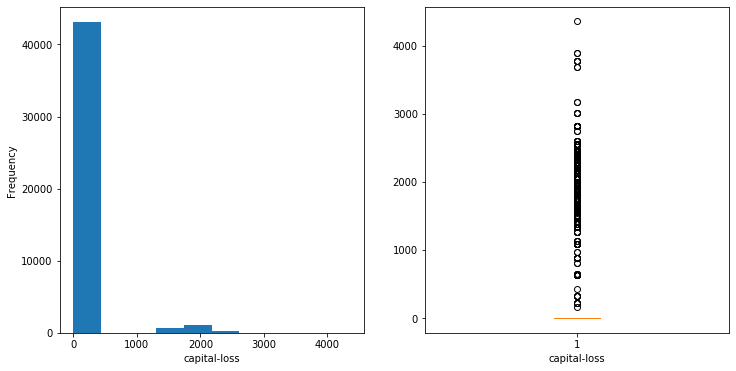

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
df['capital-loss'].plot.hist(bins=10)
plt.xlabel("capital-loss")

plt.subplot(1,2,2)
plt.boxplot(df["capital-loss"])
plt.xlabel("capital-loss")

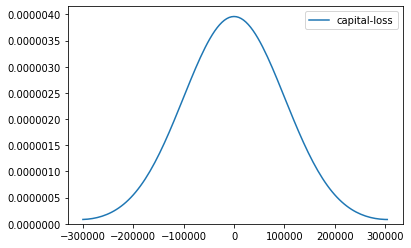

In [28]:
sns.kdeplot(df["capital-loss"],bw=100000)

<ul>
<li>All non zero values in capital-loss are treated as outliers as there are very few non zero values</li>

</ul>

Text(0, 0.5, 'educational-num')

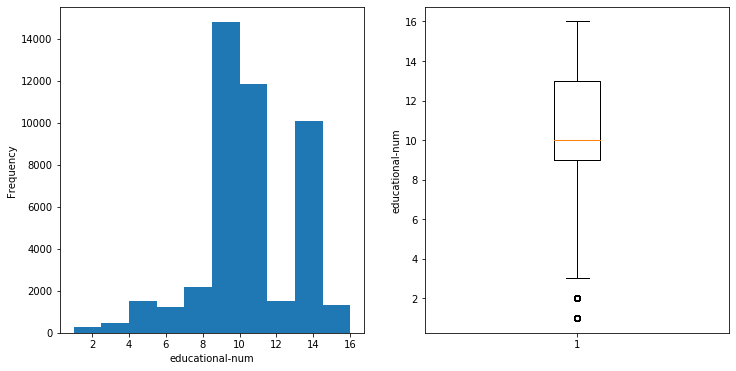

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
df['educational-num'].plot.hist(bins=10)
plt.xlabel("educational-num")

plt.subplot(1,2,2)
plt.boxplot(df["educational-num"])
plt.ylabel("educational-num")

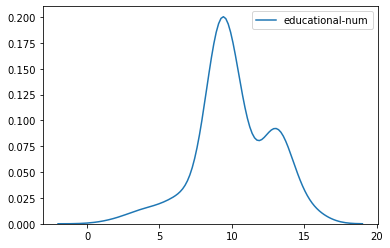

In [30]:
sns.kdeplot(df["educational-num"],bw=1)

<ul>
<li>Maximum people have an educational-num between 9.5-11.5</li>
<li>There are fare number of people having educational num between 13.5-14.5</li>
<li>Some outliers are present that show the educational-num to be less than even 2</li>
</ul>

### CATERGORICAL VARIABLE

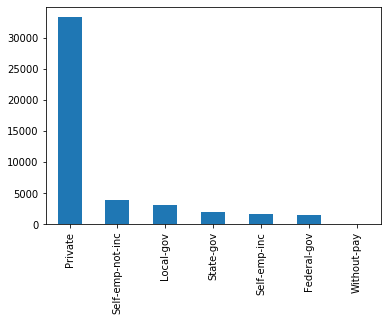

In [31]:
df['workclass'].value_counts().plot(kind = 'bar')

 There are broadly only 4 classification of work place<ul>
     <li>Private</li>
     <li>Goverment job (includes local gov,state-gov,ferdral gov)</li>
     <li>Self emoployed(include self-emp-not-inc,self-emp-inc)</li>
     <li>Without-pay</li>
    </ul>

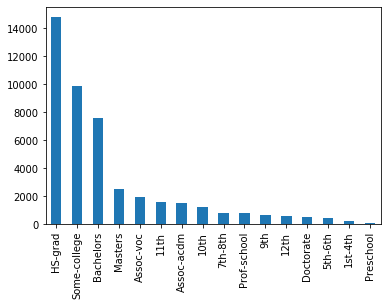

In [32]:
#sns.countplot(x="education",data=df)
df["education"].value_counts().plot(kind="bar")

<ul>
<li>Most of the people are high-school gradguates</li>
<li>Professional degree are less popular to be acquired </li>

</ul>

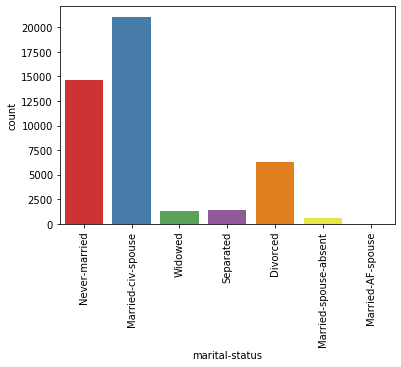

Married-civ-spouse       0.465592
Never-married            0.322807
Divorced                 0.139246
Separated                0.031202
Widowed                  0.028238
Married-spouse-absent    0.012206
Married-AF-spouse        0.000708
Name: marital-status, dtype: float64

In [33]:
plot=sns.countplot(x='marital-status', data=df, palette='Set1')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()
df["marital-status"].value_counts(normalize=True)

<ul>
<li>46% of  the population is married</li>
<li>32% of people are never-married</li>

</ul>

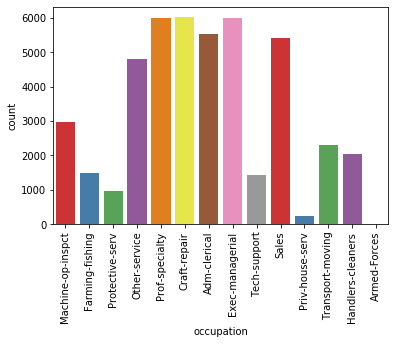

In [34]:
plot=sns.countplot(x='occupation', data=df, palette='Set1')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

<ul>
<li>Prof-speciality,craft-repair,exec-managerical,sales fields have the highest no. of people employed </li>
<li>protective-serv,piv-house-serv,armed-forces feilds have least no. of people employed </li>

</ul>

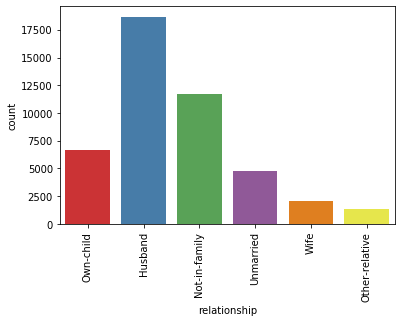

In [35]:
plot=sns.countplot(x='relationship', data=df, palette='Set1')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

<ul>
<li>Most of the working people are men , and most of the men are married</li>
<li>There are large number of people who live away fromm there families</li>

</ul>

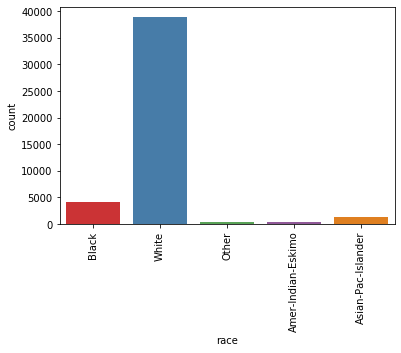

In [36]:
plot=sns.countplot(x='race', data=df, palette='Set1')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

<ul>
<li>Most of the jobs are of to white people</li>
<li>Travelling of people in search of job was quite less that time.</li>

</ul>

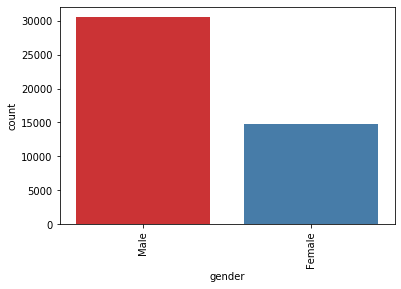

In [37]:
plot=sns.countplot(x='gender', data=df, palette='Set1')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

<ul>
<li>The majority of jobs are associated with men</li>

</ul>

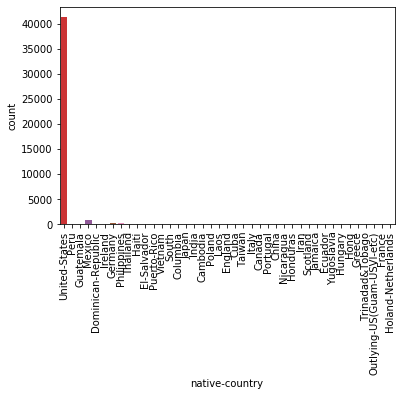

In [38]:
plot=sns.countplot(x='native-country', data=df, palette='Set1')
plt.setp(plot.get_xticklabels(),rotation=90)
plt.show()

<ul>
<li>Travelling for job to other country was significantly less that time</li>

</ul>

# BIVARIATE ANALYSIS

### CONTINOUS-CONTINOUS VARIABLE

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
educational-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


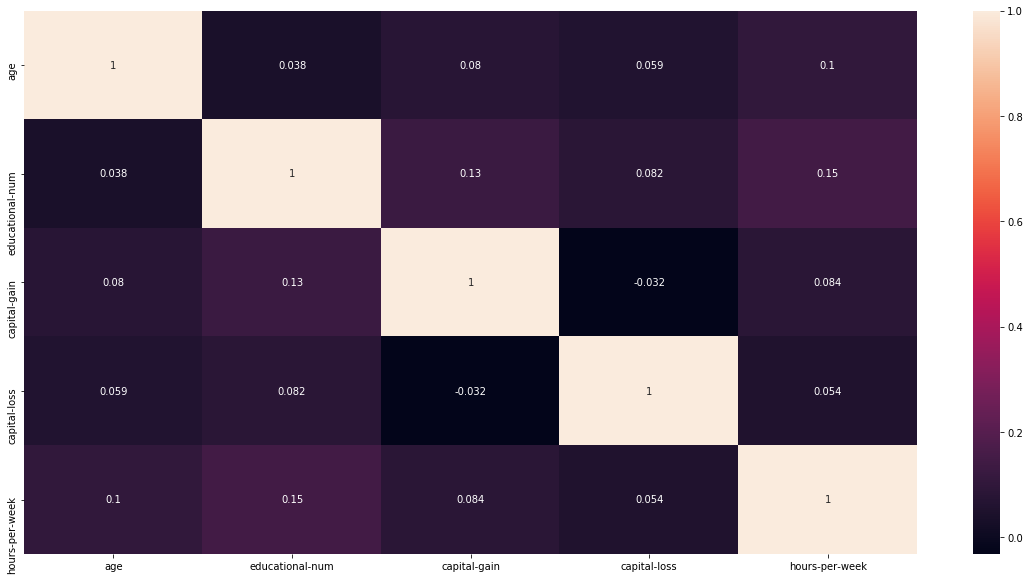

In [39]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c

<ul>
<li>There is no strong correlation between any of the continous variables</li>
<li>Dependencies of all the coulums almost tendences to 0 </li>

</ul>

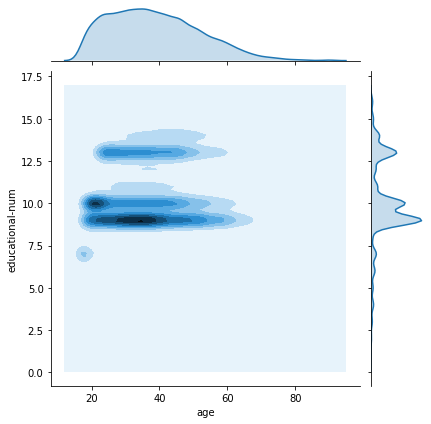

In [40]:
sns.jointplot(x='age', y='educational-num', data=df, kind = 'kde')

<ul>
<li>THe lower age range from 20-45 has a better educational-num</li>
<li>There are few people having higher value of educational-num that lie in range of 20-60</li>

</ul>

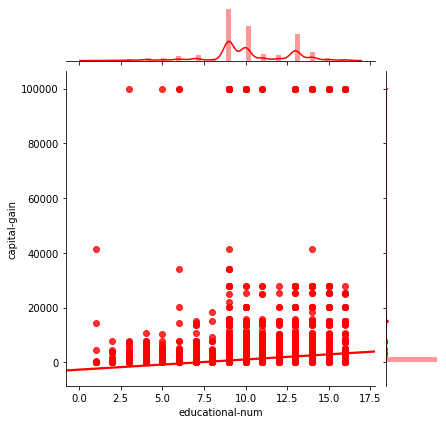

In [41]:
sns.jointplot(x="educational-num",y="capital-gain",kind="reg",color="r",data=df)

<ul>
<li>The people having more than 9 educational-num have significantly more number of capital-gains</li>
<li>Most of the people dont have any capital gaiin irrespective of there educatonal-num</li>

</ul>

### CONTINOUS-CATEGORICAL VARIBALE

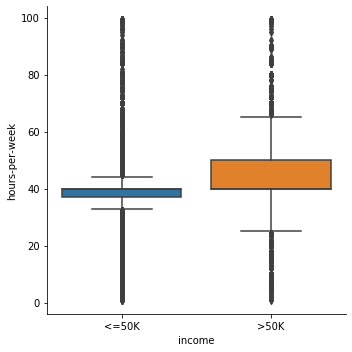

In [42]:
sns.catplot(x="income", y="hours-per-week",  kind="box", data=df)

<ul>
<li>(<=50k) average hours-per-week = 40hrs</li>
<li>(>50k) average hours-per-week = 45hrs</li>

</ul>


workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,
<=50K,10.390898,10.550572,9.442739,10.235695,9.667519,10.827489,8.947368
>50K,11.699454,12.163934,11.390291,11.948465,11.603399,12.786538,9.000000


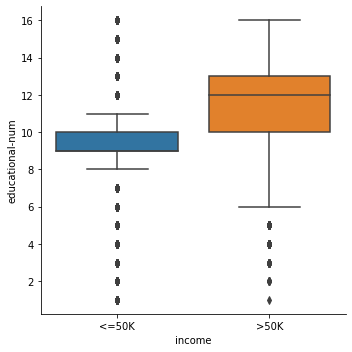

In [43]:
sns.catplot(x="income", y="educational-num",  kind="box", data=df)
df.pivot_table(index="income",columns='workclass',values="educational-num",aggfunc='mean')

<ul>
<li>The outliers in the garph shows people who have relatively very less or very high education-num</li>
<li>some people who have increadibly high education-num still have a income less than 50 k 
    this must be due to lack of skilled jobs in there feilds</li>

</ul>

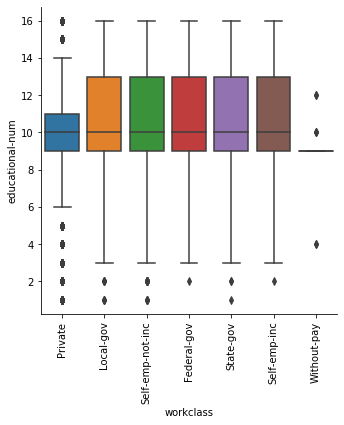

In [44]:
plot=sns.catplot(x="workclass", y="educational-num",  kind="box", data=df)
plot.set_xticklabels(rotation=90)
plt.show()

<ul>
<li>Private company has alot of people with low educational-num </li>
<li>there are some employs in difeerent sectors that have educational-num less than 2</li>

</ul>

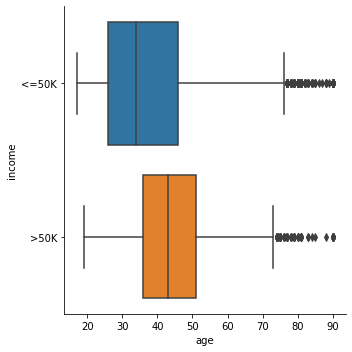

In [45]:

sns.catplot(x="age",y="income",data=df,kind="box")

<ul>
<li>there are outliers with people who work above the age of 75 </li>
<li>the average age of person with <=50k is 35</li>
<li>Avergae age of person >50 k is around 45</li>

</ul>

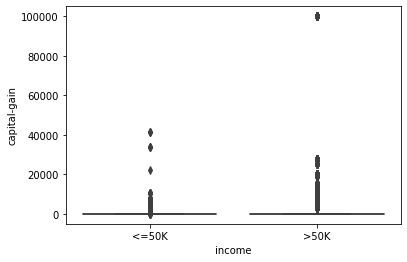

In [46]:
sns.boxplot(x="income",y="capital-gain",data=df)

<ul>
<li>In most case capital-gain is 0</li>
<li>There lies some gain in range of (0,40000) when income<=50 k </li>
<li>There lies some gain in range of (0,30000) and one extreme point at 100000 when income>50 k </li>
</ul>

### CATEGORICAL-CATEGORICAL VARIABLE

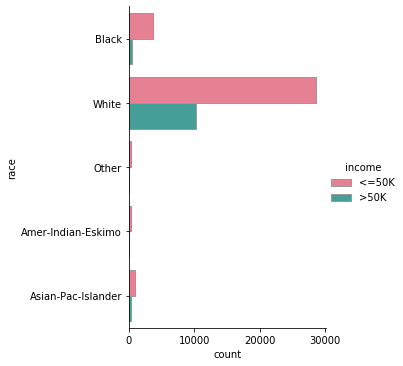

In [47]:
sns.catplot(y="race", hue="income", kind="count",
            palette="husl", edgecolor=".6",
            data=df);

<ul>
<li>The white race has the maxium count on bothn the division of income</li>

</ul>

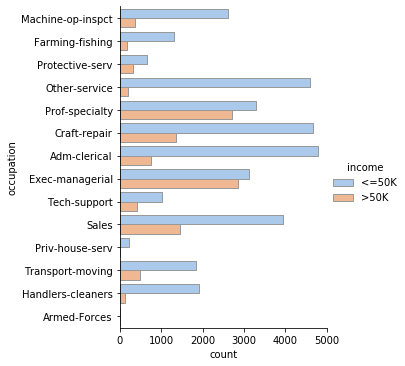

In [48]:
sns.catplot(y="occupation", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

<ul>
<li>Craft-repair,Sales,Adm-clerical,Other-service have highest count for income <=50 k </li>
<li>Exec-managerial,Prof-speciality have higher counts for income >50k</li>

</ul>

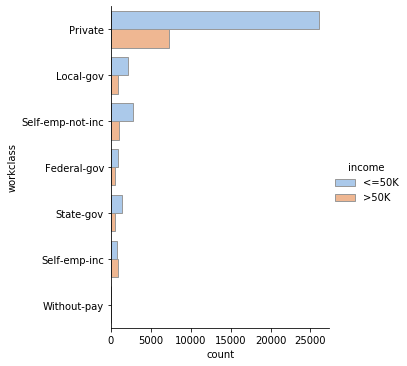

In [49]:
sns.catplot(y="workclass", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

<ul>
<li>Private jobs tendes to have low income </li>
<li>Self-emp-inc have higher income counts</li>

</ul>

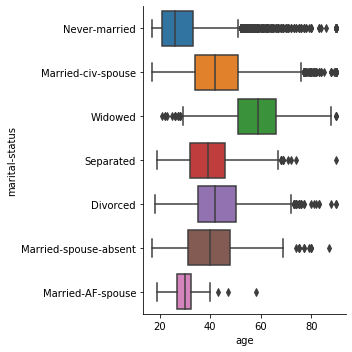

In [50]:
sns.catplot(x="age",y="marital-status",kind="box",data=df)

<ul>
<li>There are highly aged people that never-married</li>
</ul>


# MULIVARIATE ANALYSIS

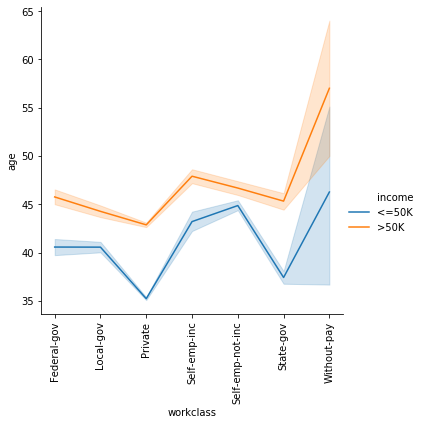

In [51]:
plot=sns.relplot(x="workclass",y="age",hue="income",data=df,kind="line")
plot.set_xticklabels(rotation=90)
plt.show()

<ul>
<li>Private workclass have relatively younger generation working with them.</li>
<li>There is a broad range of people working without pay</li>
<li>Govertment jobs have comaparivetly more aged people than any other workclass</li>
</ul>

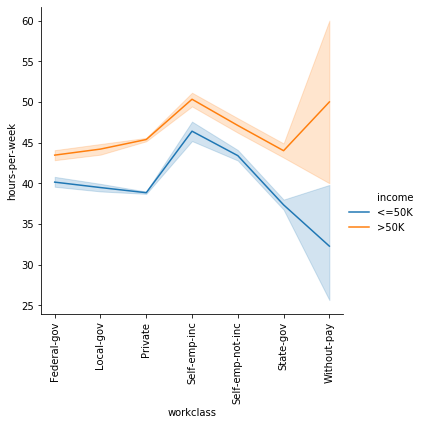

In [52]:
p=sns.relplot(x="workclass",y="hours-per-week",hue="income",data=df,kind="line")
p.set_xticklabels(rotation=90)
plt.show()

<ul>
<li>Self imployedpeople work more than any other working class </li>
<li>The goverment jobs have relatively less hours-per-week</li>

</ul>

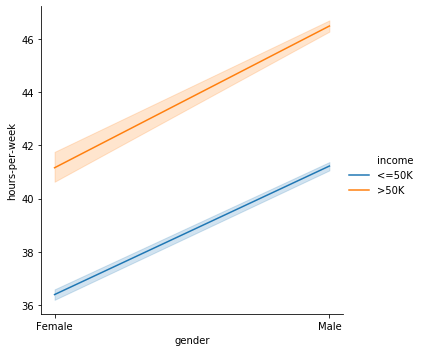

In [53]:
sns.relplot(x="gender",y="hours-per-week",hue="income",data=df,kind="line")

<ul>
<li>Men work relatively more number of hours than female in the same category of income</li>
<li>women (<=50k) on avg works 38hrs </li>
<li>men (<=50k) on avg works 40hrs</li>
<li>women (>50k) on avg works 41hrs</li>
<li>men (>50k) on avg works 46hrs</li>
</ul>

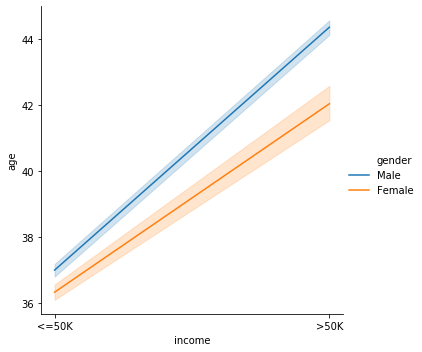

In [54]:
sns.relplot(x="income",y="age",hue="gender",data=df,kind="line")


<ul>
<li>Women on an avg has an age of 36 (<=50k)</li>
<li>Men on an avg has an age of 37 (<=50k)</li>
<li>Women on an avg has an age of 41 (>50k)</li>
<li>Men on an avg has an age of 44 (>50k)
</li></ul>

age            capital-gain              capital-loss  \
income      <=50K       >50K        <=50K         >50K        <=50K   
gender                                                                
Female  36.337479  42.036549   124.088055  4209.846016    46.032474   
Male    37.005098  44.350666   164.499285  3953.639585    58.997522   

                   educational-num            hours-per-week             
income        >50K           <=50K       >50K          <=50K       >50K  
gender                                                                   
Female  182.043739        9.882543  11.849011      36.391678  41.156980  
Male    195.489255        9.474509  11.554670      41.221746  46.483699

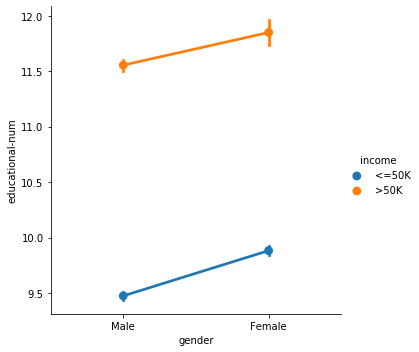

In [55]:

sns.catplot(x="gender",y="educational-num",hue="income",kind="point",data=df)
df.pivot_table(index="gender",columns='income',aggfunc="mean")

<ul>
<li>Females have a higher educational number then men for a particular icome set</li>
<li>Average educational num of female in case of income less than 50k is 10.0
    where as men is below 9.5</li>
<li>Average educational num of female ,income more than 50k is 11.8
    where as men have an average of 11.5</li>
</ul>

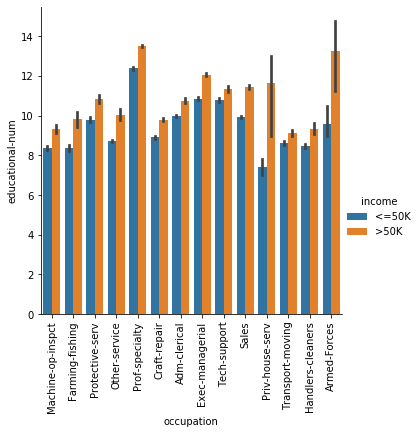

In [56]:
plot=sns.catplot(x="occupation",y="educational-num",hue="income",kind="bar",data=df)
plot.set_xticklabels(rotation=90)
plt.show()

<ul>
<li>Prof-speciality,armed forces accounts of higher educational-num</li>
<li>Machine-op-inspct,Sales accounts of lower educational-num</li>

</ul>

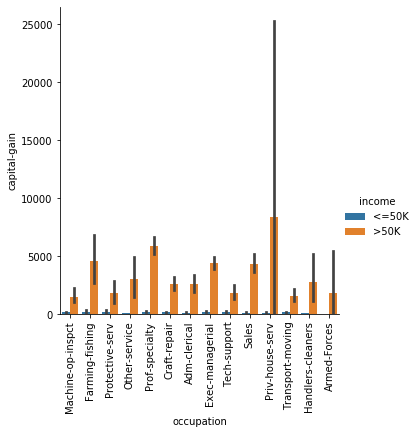

In [57]:
plot=sns.catplot(x="occupation",y="capital-gain",hue="income",kind="bar",data=df)
plot.set_xticklabels(rotation=90)
plt.show()

<ul>
<li>People working in Pri-House-sev has high capital gain than any other profession</li>
<li>Tech-support has the lowest capital-gain</li>

</ul>

# CONCLUSION

<ul>
<li>The educational-num is the best way to detect the predictions</li>
<li>There are less correlation between variables</li> 
<li>Chances of having higher income is if age and edcuational-num is high</li>
<li>People working in private firm has chances of less income</li>


</ul>

# FEATURE TRANSFORMATION

In [58]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [59]:
df = pd.get_dummies(df)

In [60]:
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [61]:
from sklearn import preprocessing

In [62]:
names=df.columns
print(names)

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc',
       ...
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia', 'income_<=50K',
       'income_>50K'],
      dtype='object', length=105)


In [63]:
min_max_scaler=preprocessing.MinMaxScaler()

In [64]:

df_scaled=min_max_scaler.fit_transform(df)
pd.DataFrame(df_scaled,columns=names)


,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.232877,0.333333,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.630137,0.933333,0.031030,0.0,0.316327,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.095890,0.600000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.520548,0.200000,0.000000,0.0,0.091837,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.657534,0.533333,0.064181,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,0.260274,0.800000,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
